In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Convert the dataset into pandas dataframe

In [2]:
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Add overweight column and modify it according yo BMI

In [3]:
df['overweight'] = [1 if x > 25 else 0 for x in (df['weight'] / ((df['height']/100) ** 2))]
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


### Normalize data for 0 always good and 1 always bad

In [4]:
df['gluc'] = [0 if x == 1 else 1 for x in df['gluc']]
df['cholesterol'] = [0 if x == 1 else 1 for x in df['cholesterol']]
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


### Visulaize data with two values of cardio

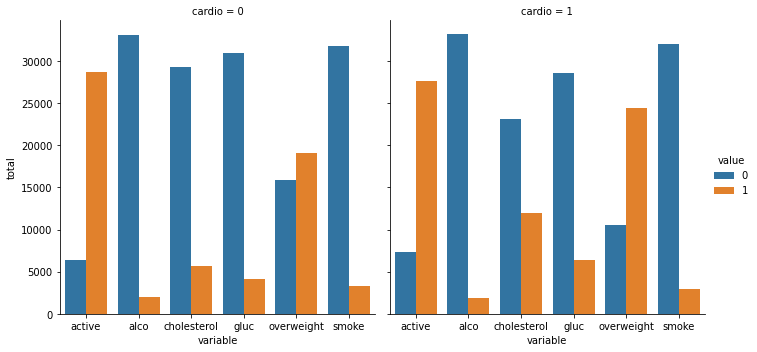

In [73]:
def draw_cat_plot():
    data = pd.melt(df, id_vars = ['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
    df_cat = pd.DataFrame(data=pd.melt(df, id_vars = ['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']))
    cat_order = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']
    fig = sns.catplot(x='variable', hue='value', data=df_cat, kind='count', col='cardio', order=cat_order)
    fig.set_ylabels('total')
    fig.savefig('catplot.png')
    return fig
draw_cat_plot()

### Clean data and draw the heatmap

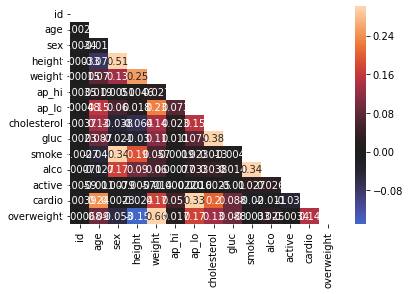

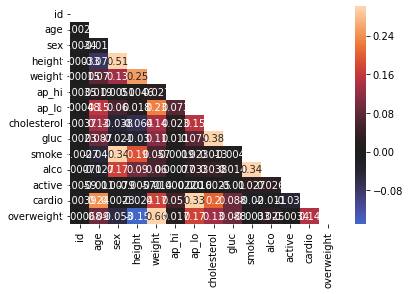

In [5]:
def draw_heat_map():
    # Clean the data
    clean_ap = df['ap_lo'] <= df['ap_hi']
    clean_height = (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975))
    clean_weight = (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))
    clean_df = clean_ap & clean_height & clean_weight
    df_heat = df[clean_df]
    corr = df_heat.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    
    fig = sns.heatmap(corr, center=0, mask = mask, annot=True, vmax=0.30)
    cbar = fig.collections[0].colorbar
    cbar.set_ticks(np.linspace(-0.08, 0.24, 5))
    fig = fig.figure
    
    fig.savefig('heatmap.png')
    return fig
draw_heat_map()